In [1]:
import json
import dill
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [87]:
path = 'sample_trajectories/choose-date_0529063403.json'

with open(path,'r') as f:
    trajectory = json.load(f)

trajectory

{'taskName': 'choose-date',
 'utterance': 'Select 08/25/2016 as the date and hit submit.',
 'states': [{'time': 1,
   'action': None,
   'dom': {'tag': 'BODY',
    'left': 0,
    'top': 0,
    'width': 1146,
    'height': 210,
    'children': [{'tag': 'DIV',
      'left': 0,
      'top': 0,
      'width': 160,
      'height': 210,
      'children': [{'tag': 'DIV',
        'left': 0,
        'top': 50,
        'width': 160,
        'height': 71,
        'children': [{'tag': 'P',
          'left': 2,
          'top': 52,
          'width': 156,
          'height': 22,
          'children': [{'tag': 't',
            'left': 2,
            'top': 58,
            'width': 26.699996948242188,
            'height': 13,
            'ref': -1,
            'children': [],
            'text': 'Date:'},
           {'tag': 'INPUT_text',
            'left': 28.699996948242188,
            'top': 52,
            'width': 128,
            'height': 22,
            'children': [],
            'id': 'da

In [228]:
def click2dom_trajectory(trajectory):
    env_type = trajectory['taskName']
    trajectory_out = {}
    last_coordinates = (0,0)
    trajectory_out['taskName'] = env_type
    trajectory_out['utterance'] = trajectory['utterance']
    j=1
    for i, state in enumerate(trajectory['states']):
        new_state = {}
        if i == 0:
            trajectory_out['states'] = [trajectory['states'][i]]
            continue
        if state['action']['type'] not in  ['click', 'keydown'] or state['action']['timing']==3:
            continue
        #if state['action']['type'] == 'click': 
        #    if j!=1 and\
        #        trajectory_out['states'][j-1]['action']['type'] ==  trajectory['states'][i]['action']['type']\
        #        and trajectory_out['states'][j-1]['action']['x'] ==  trajectory['states'][i]['action']['x'] \
        #        and trajectory_out['states'][j-1]['action']['y'] ==  trajectory['states'][i]['action']['y']:
        #        continue
        #if state['action']['type'] == 'keydown': 
        #    if j!=1 and\
        #        trajectory_out['states'][j-1]['action']['type'] ==  trajectory['states'][i]['action']['type']\
        #        and trajectory_out['states'][j-1]['action']['keyCode'] ==  trajectory['states'][i]['action']['keyCode']:
        #        continue
        new_state['action'] = state['action']
        new_state['action1'] = click2dom_action(state)
        new_state['dom_elements'] = trajectory['states'][i]['dom']
        trajectory_out['states'].append(new_state)
        j+=1
    for state in trajectory_out['states']:
        if state['action'] is not None:
            state['action_coords'] = state['action']
            state['action'] = state['action1']
            del state['action1']
    return trajectory_out
trajectory_out = click2dom_trajectory(trajectory)

In [126]:
[x['action'] for x in trajectory['states'][1:] if x['action']['timing']!=3]

[{'type': 'mousedown', 'x': 78, 'y': 65, 'timing': 1},
 {'type': 'mouseup', 'x': 78, 'y': 65, 'timing': 1},
 {'type': 'click', 'x': 78, 'y': 65, 'timing': 1},
 {'type': 'mousedown', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'mouseup', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'click', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'mousedown', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'mouseup', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'click', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'mousedown', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'mouseup', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'click', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'mousedown', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'mouseup', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'click', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'mousedown', 'x': 106, 'y': 160, 'timing': 1},
 {'type': 'mouseup', 'x': 106, 'y': 160, 'timing': 1},
 {'type': 'click', 'x': 106, 'y': 160, 'timing': 1},
 {'type': 'mousedown', 'x': 92, 'y': 95,

In [229]:
[x['action_coords'] for x in trajectory_out['states'][1:]]

[{'type': 'click', 'x': 78, 'y': 65, 'timing': 1},
 {'type': 'click', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'click', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'click', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'click', 'x': 39, 'y': 84, 'timing': 1},
 {'type': 'click', 'x': 106, 'y': 160, 'timing': 1},
 {'type': 'click', 'x': 92, 'y': 101, 'timing': 1}]

In [127]:
[x['action'] for x in trajectory_out['states'][1:]]

['Click on  - CLICK_ELEMENT 5',
 'Click on Prev - CLICK_ELEMENT 11',
 'Click on Prev - CLICK_ELEMENT 108',
 'Click on Prev - CLICK_ELEMENT 204',
 'Click on Prev - CLICK_ELEMENT 309',
 'Click on 25 - CLICK_ELEMENT 483',
 'Click on Submit - CLICK_ELEMENT 7']

In [118]:
def tree_search(current, ref, id_, coords):
    for element in current['children']:
        if element['left'] < coords['x'] and (element['left'] + element['width']) > coords['x'] \
            and element['top'] < coords['y'] and (element['top'] + element['height']) > coords['y']:
            ref = element['ref']
            id_ = element.get('text','')
            if element['children']:
                ref,id_ = tree_search(element, ref, id_, coords)
            else:
                continue

    return ref,id_

def click2dom_action(state):
    coords = {'x':state['action']['x'],'y':state['action']['y']}
    actions = {'click': 'CLICK_ELEMENT', 'keydown':'TYPE_TEXT'}
    ref = 0
    id_ = ''
    current = state['dom']
    
    ref, id_ = tree_search(current, ref, id_, coords)
    action = '{} on {} - {} {}'.format(state['action']['type'].capitalize(),id_
                                      ,actions[state['action']['type']],ref)
    return action
#click2dom_action(trajectory_out['states'][1])

In [21]:
ref_trajectory = dill.load(open('trajectories_gemini/choose-date/choose-date01.pkd','rb'))
#ref_trajectory = dill.load(open('trajectories_gemini/book-flight/book-flight02.pkd','rb'))

In [22]:
ref_trajectory['states'][1]['action']

'Enter text 09/22/2016 in the date input field - TYPE_TEXT 5'

In [40]:
'hello'.capitalize()

'Hello'

In [25]:
ref_trajectory['states'][1]['dom_elements'][5]

{'ref': 5,
 'parent': 4,
 'left': array([28.6875], dtype=float32),
 'top': array([52.], dtype=float32),
 'width': array([128.], dtype=float32),
 'height': array([21.], dtype=float32),
 'tag': 'input_text',
 'text': '',
 'value': '',
 'id': 'datepicker',
 'classes': 'hasDatepicker',
 'bg_color': array([1., 1., 1., 1.], dtype=float32),
 'fg_color': array([0., 0., 0., 1.], dtype=float32),
 'flags': array([0, 0, 0, 1], dtype=int8)}

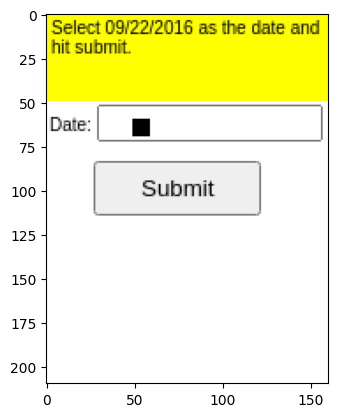

In [131]:
def add_click(image, y_coord, x_coord):
    image[x_coord-5:x_coord+5, y_coord-5:y_coord+5,:] =0
    plt.imshow(image.astype(int))
    return 
add_click(ref_trajectory['states'][0]['screenshot'], 54, 65)

In [154]:
from google.cloud import aiplatform
import vertexai.preview
from vertexai.preview.generative_models import GenerativeModel, Part, ChatSession

from PIL import Image
from google.cloud import storage

BUCKET = 'miniwobimages'

project_id = "cs224n-420704"
aiplatform.init(project=project_id)
vertexai.preview.init()
model = GenerativeModel(model_name="gemini-1.5-pro-preview-0514")
client = storage.Client(project=project_id)
bucket = client.get_bucket(BUCKET)

In [157]:
from environment import MiniWoBEnvironment
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [211]:
def delete_header(image):
    image[:50,:] = [255,255,0]
    return image

def convert_to_image(nparray):
    filename = 'image.png'
    image = Image.fromarray(nparray)
    image.save(filename)
    source_file_name = filename
    blob = bucket.blob(filename)
    blob.upload_from_filename(filename)

In [286]:
def save_trajectory(actions, doms, images, env_type, utterance=''):
    traj = {}
    traj['utterance'] = utterance
    traj['states'] = []
    for i in range(len(actions)):
        state = {}
        state['action'] = actions[i]
        state['dom_elements'] = doms[i]
        state['screenshot'] = images[i]
        traj['states'].append(state)
    #    filename = name_file(env_type)
    #dill.dump(traj, open(filename,'wb'))
    #print('saved trajectory in file',filename)
    return traj

def coord2ref(coords, dom):
    ### deprecated, goes with deprecated coord2act_chose_date
    ref = 0
    for element in dom:
        if element['left'] < coords['x'] \
        and (element['left'] + element['width']) > coords['x'] \
        and element['top'] < coords['y'] \
        and (element['top'] + element['height']) > coords['y']:
            ref = max(ref, element['ref'])
            id_ = element['text']
    return ref, id_

def coord2act_chose_date(t):
    ### deprecated because prev_arrow doesn't work on miniwob
    goal = t['utterance']
    env_type = t['taskName']
    d_actions = {'click': 'CLICK_ELEMENT', 'keydown':'TYPE_TEXT'}
    
    env = MiniWoBEnvironment(env_type, wait_ms=500,render_mode='human')
    observation, info = env.reset()
    actions  = ['']
    doms = [observation['dom_elements']]
    images = [delete_header(observation['screenshot'])]
    
    for state in t['states'][1:]:
        coords = {'x':state['action_coords']['x'],'y':state['action_coords']['y']}
        print(coords)
        ref, text = coord2ref(coords, dom)
        print(ref,text)
        action = env.create_action('CLICK_ELEMENT', ref=ref)
        observation, reward, terminated, truncated, info = env.step(action)
        observation, reward, terminated, truncated, info = env.step(action)
        action = '{} on {} - {} {}'.format(state['action_coords']['type'].capitalize()
                                ,text ,d_actions[state['action_coords']['type']],ref)
        print(action)
        actions.append(action)
        images.append(delete_header(observation['screenshot']))
        doms.append(observation['dom_elements'])
    env.close()
    return save_trajectory(actions, doms, images, env_type, goal)

def coord2ref(coords, dom):
    ref = 0
    for element in dom:
        if element['left'] < coords[0] \
        and (element['left'] + element['width']) > coords[0] \
        and element['top'] < coords[1] \
        and (element['top'] + element['height']) > coords[1]:
            ref = max(ref, element['ref'])
            id_ = element['text']
    return ref, id_

def coord2act_chose_date():
    goal = 'Select 12/07/2016 as the date and hit submit.'
    env_type = 'choose-date'
    coords = [(78,65),(57,130),(92,101)]
    
    env = MiniWoBEnvironment(env_type, wait_ms=500,render_mode='human')
    observation, info = env.reset()
    actions  = ['']
    doms = [observation['dom_elements']]
    images = [delete_header(observation['screenshot'])]
    
    for x,y in coords:
        print(x,y)
        ref, text = coord2ref((x,y), dom)
        print(ref,text)
        action = env.create_action('CLICK_ELEMENT', ref=ref)
        observation, reward, terminated, truncated, info = env.step(action)

        observation, reward, terminated, truncated, info = env.step(action)
        action = 'Click on {} - CLICK_ELEMENT {}'.format(text ,ref)
        print(action)
        actions.append(action)
        images.append(delete_header(observation['screenshot']))
        doms.append(observation['dom_elements'])
    env.close()
    return save_trajectory(actions, doms, images, env_type, goal)

trajectory_final = coord2act_chose_date()

78 65
5 
Click on  - CLICK_ELEMENT 5
57 130
49 5


Click on 5 - CLICK_ELEMENT 49
92 101
26 We


Click on We - CLICK_ELEMENT 26


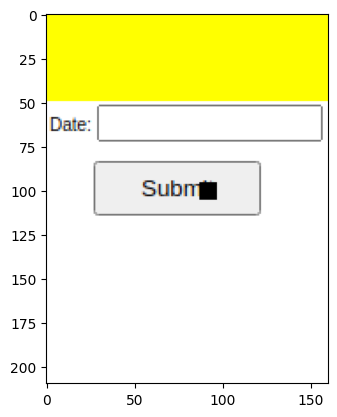

In [281]:
add_click(trajectory_final['states'][0]['screenshot'], 92,101)

In [261]:
goal = 'Select 10/03/2016 as the date and hit submit.'
actions, doms, images = [], [], []

env = MiniWoBEnvironment('choose-date', wait_ms=500,render_mode='human')
observation, info = env.reset()

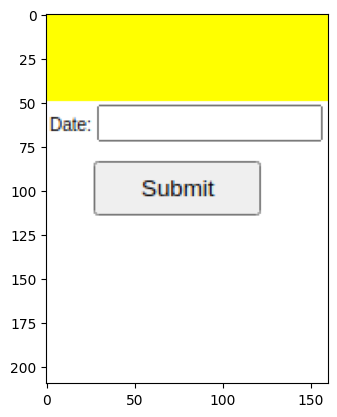

In [262]:
image = delete_header(observation['screenshot'])
dom = observation['dom_elements']

actions.append('')
images.append(image)
doms.append(dom)
plt.imshow(image)

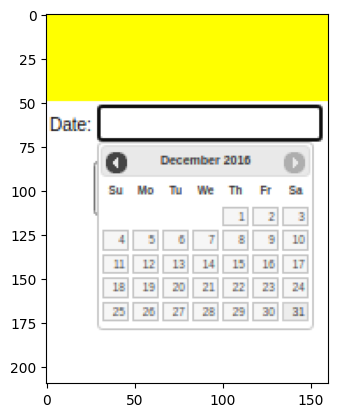

In [263]:
action = env.create_action('CLICK_ELEMENT', ref=5)
observation, reward, terminated, truncated, info = env.step(action)
action = env.create_action('CLICK_ELEMENT', ref=5)
observation, reward, terminated, truncated, info = env.step(action)
image = delete_header(observation['screenshot'])
dom = observation['dom_elements']
actions.append('Click on datepicker input field - CLICK_ELEMENT 5')
images.append(image)
doms.append(dom)
plt.imshow(image)

In [264]:
def create_prompt2(coords,dom):
    prompt = '''Given the following DOM elements representing an HTML page {},
                provide the ref number of the topmost DOM element where
                the following coordinates fall: x={}, y={},
                assuming the origin at the upper left corner'''.format(
        dom, coords[0],coords[1])
    return prompt

coord_source = trajectory_out['states'][1]['action_coords']
x = coord_source['x']
y = coord_source['y']
prompt = create_prompt2((x,y),dom)
chat = model.start_chat()
response = chat.send_message(prompt).text
response

'The DOM element with ref **5** (the `input_text` with id "datepicker") covers this coordinate. \n\nHere\'s why:\n\n* **Coordinate:** (x=78, y=65)\n* **Element 5:**\n    * `left`: 28.6875\n    * `top`: 52\n    * `width`: 128 \n    * `height`: 21\n\n* **Calculations:**\n    * The element\'s right edge is at 28.6875 + 128 = 156.6875\n    * The element\'s bottom edge is at 52 + 21 = 73\n    * The x-coordinate (78) falls between the left and right edges.\n    * The y-coordinate (65) falls between the top and bottom edges. \n\nSince the coordinate falls within the boundaries of element 5, and it is higher in the DOM hierarchy compared to other potential candidates, it is considered the topmost element at that location. \n'

In [265]:
dom

({'ref': 1,
  'parent': 0,
  'left': array([0.], dtype=float32),
  'top': array([0.], dtype=float32),
  'width': array([500.], dtype=float32),
  'height': array([210.], dtype=float32),
  'tag': 'body',
  'text': '',
  'value': '',
  'id': '',
  'classes': '',
  'bg_color': array([0.33333334, 0.33333334, 0.33333334, 1.        ], dtype=float32),
  'fg_color': array([0., 0., 0., 1.], dtype=float32),
  'flags': array([0, 0, 0, 0], dtype=int8)},
 {'ref': 2,
  'parent': 1,
  'left': array([0.], dtype=float32),
  'top': array([0.], dtype=float32),
  'width': array([160.], dtype=float32),
  'height': array([210.], dtype=float32),
  'tag': 'div',
  'text': '',
  'value': '',
  'id': 'wrap',
  'classes': '',
  'bg_color': array([1., 1., 1., 1.], dtype=float32),
  'fg_color': array([0., 0., 0., 1.], dtype=float32),
  'flags': array([0, 0, 0, 0], dtype=int8)},
 {'ref': 3,
  'parent': 2,
  'left': array([0.], dtype=float32),
  'top': array([50.], dtype=float32),
  'width': array([160.], dtype=float

In [246]:
from utils_dev import compare_dom
compare_dom(doms[0],doms[1])

ref: 0 key: flags value1: [1 0 0 0] value2:[0 0 0 0]
4 -1 -2
ref: 5 key: flags value1: [0 0 0 1] value2:[1 1 0 1]


In [238]:
trajectory_out['states'][1]['action_coords']

{'type': 'click', 'x': 78, 'y': 65, 'timing': 1}

### Trying to identify coordinates by giving the image

In [233]:
def create_prompt1(goal,dom):
    part1 = '''You are a web agent and your goal is to use a datepicker to:
            {}
            After clicking on the date field, you see the following image of the webpage:
            '''.format(goal)
    part2 = '''I will give you step by step instructions to accomplish your goal:
            The first action is to locate the PREVIOUS arrow (arrow pointing left)
            to navigate to the previous month. State the coordinates 
            where the PREVIOUS arrow is, assuming the origin at the upper left corner.'''
    part3 = '''Provide your answer in the following format:
            Action:
            Xcoord:
            Ycoord
            '''
    return part1, part2, part3

def assemble_prompt(part1, part2, part3,image):
    convert_to_image(image)
    return [Part.from_text(part1)
            , Part.from_uri("gs://{}/image.png".format(BUCKET),mime_type="image/png")
            , Part.from_text(part3)
            , Part.from_text(part3)]


chat = model.start_chat()
part1, part2, part3 = create_prompt1(goal, dom)
prompt = assemble_prompt(part1, part2, part3,image)
response = chat.send_message(prompt).text
response

"The image shows the month of December and the requested date is in October. \n\nTherefore, you will need to click the left arrow to go back to October, then select the 10th.  Assuming the top left corner of the image corresponds to Xcoord: 0 and Ycoord: 0, and each calendar square is 25x25 pixels, here's a possible sequence of actions:\n\n**Action:** Click  (Left Arrow)\n**Xcoord:** 10 \n**Ycoord:** 30 \n\n**Action:** Click (October 10th)\n**Xcoord:** 115 \n**Ycoord:** 105 \n\n**Action:** Click (Submit)\n**Xcoord:** 60\n**Ycoord:** 50 \n"

In [227]:
response = chat.send_message('Here are the DOM elements:{}'.format(dom)).text
response

'Unfortunately, even with the DOM elements, I still cannot provide precise X and Y coordinates for interacting with the datepicker. \n\nHere\'s why:\n\n* **Missing Datepicker Structure:** The provided DOM elements describe the main input field (`input_text` with `id="datepicker"`) and the "Submit" button. However, the datepicker itself is likely a separate, dynamically generated element that appears *on top* of the page layout when you click the date input.  This structure is not included in the DOM information you provided.\n* **Layout Variations:**  The visual position of the datepicker\'s calendar (to choose the day, month, and year) can vary based on factors like the datepicker library used, CSS styling, and even the user\'s screen size.\n\n**What you would need for coordinate-based actions:**\n\n1. **Complete Datepicker HTML:**  The DOM structure of the datepicker element *after* it is made visible on the page.\n2. **Visual Rendering Information:** To calculate coordinates, you wo

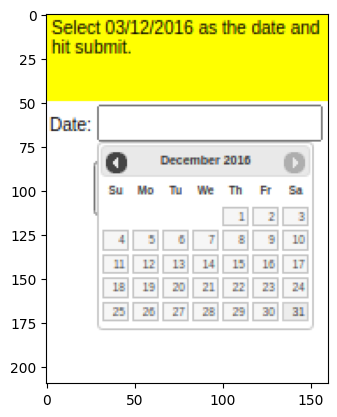

In [133]:
action = env.create_action('CLICK_ELEMENT', ref=11)
observation, reward, terminated, truncated, info = env.step(action)
plt.imshow(observation['screenshot'])

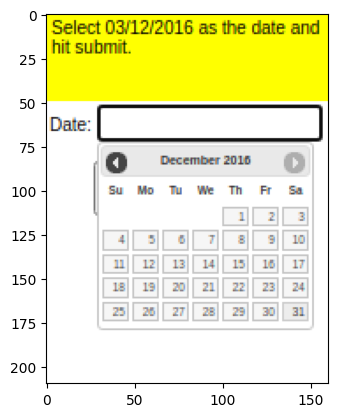

In [134]:
action = env.create_action('CLICK_ELEMENT', ref=108)
observation, reward, terminated, truncated, info = env.step(action)
plt.imshow(observation['screenshot'])

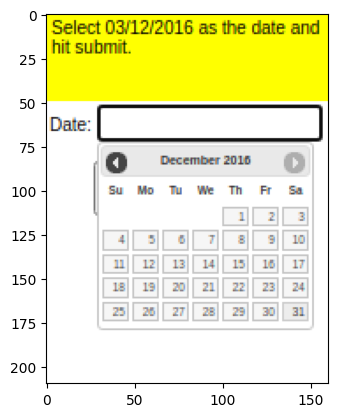

In [135]:
action = env.create_action('CLICK_ELEMENT', ref=204)
observation, reward, terminated, truncated, info = env.step(action)
plt.imshow(observation['screenshot'])

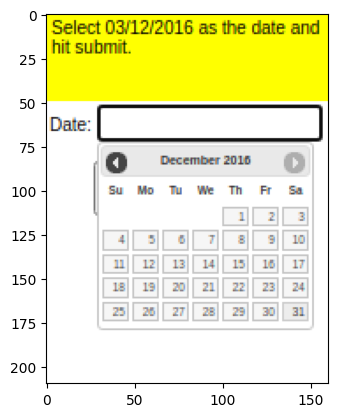

In [136]:
action = env.create_action('CLICK_ELEMENT', ref=309)
observation, reward, terminated, truncated, info = env.step(action)
plt.imshow(observation['screenshot'])

In [ ]:
compare_dom
    

In [250]:

#actions, doms, images = [], [], []

env = MiniWoBEnvironment('book-flight', wait_ms=500,render_mode='human')
observation, info = env.reset()

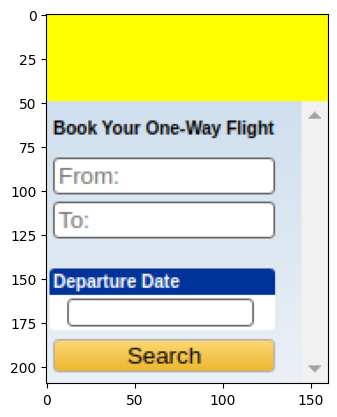

In [251]:
image = delete_header(observation['screenshot'])
dom = observation['dom_elements']

#actions.append('')
#images.append(image)
#doms.append(dom)
plt.imshow(image)

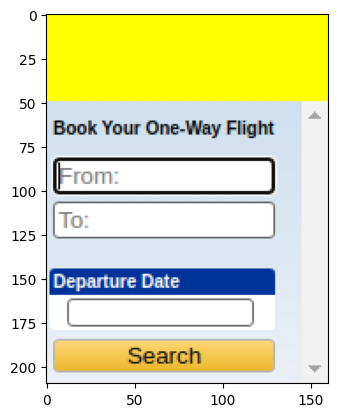

In [252]:
action = env.create_action('CLICK_ELEMENT', ref=7)
observation, reward, terminated, truncated, info = env.step(action)
image = delete_header(observation['screenshot'])
dom = observation['dom_elements']
#actions.append('Click on datepicker input field - CLICK_ELEMENT 5')
#images.append(image)
#doms.append(dom)
plt.imshow(image)

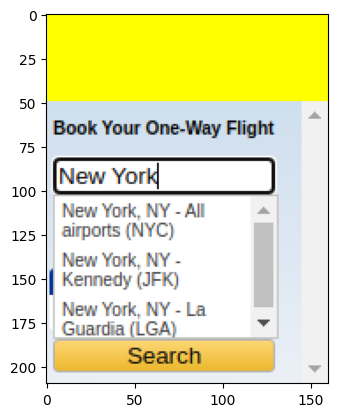

In [253]:
action = env.create_action('TYPE_TEXT', ref=7, text='New York')
observation, reward, terminated, truncated, info = env.step(action)
image = delete_header(observation['screenshot'])
dom = observation['dom_elements']
#actions.append('Click on datepicker input field - CLICK_ELEMENT 5')
#images.append(image)
#doms.append(dom)
plt.imshow(image)

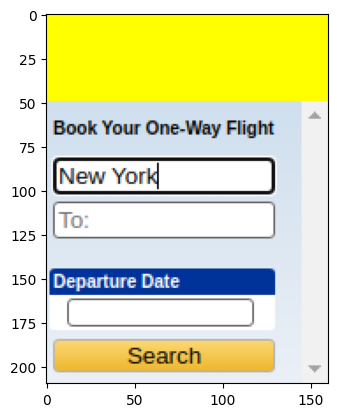

In [254]:
action = env.create_action('CLICK_ELEMENT', ref=7)
observation, reward, terminated, truncated, info = env.step(action)
image = delete_header(observation['screenshot'])
dom = observation['dom_elements']
#actions.append('Click on datepicker input field - CLICK_ELEMENT 5')
#images.append(image)
#doms.append(dom)
plt.imshow(image)